# Recurrent Neural Networks Models

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_load import Data_Reader

In [22]:
load_data = Data_Reader()

In [23]:
df = load_data.get_df()

In [24]:
df.head()

,ano,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
0,2001,135.9,68.7,138.8,3.6,9.8,0.4,0.0,0.2,71.0,69.8,56.6,217.4
1,2002,49.8,12.0,67.6,54.0,28.8,0.6,0.0,0.0,87.0,113.0,119.2,85.6
2,2003,51.0,79.4,63.0,79.2,8.0,0.0,0.0,0.6,1.0,165.4,104.8,71.2
3,2004,19.4,89.4,45.2,15.4,34.4,0.0,0.0,4.2,1.0,69.0,27.2,38.0
4,2005,4.2,27.2,16.8,7.0,15.0,0.0,7.0,0.0,0.0,106.0,143.0,72.0


In [25]:
mydata = load_data.transform()

In [26]:
mydata

,precipitacao
mes,
2001-01-01,135.9
2001-02-01,68.7
2001-03-01,138.8
2001-04-01,3.6
2001-05-01,9.8
...,...
2022-08-01,NaN
2022-09-01,NaN
2022-10-01,NaN


In [27]:
# Dropping last n rows using drop
# Count null values to remove
null_values = mydata.isnull().sum()
mydata.drop(mydata.tail(null_values[0]).index, inplace = True)

<AxesSubplot:title={'center':'Precipitação'}, xlabel='mes'>

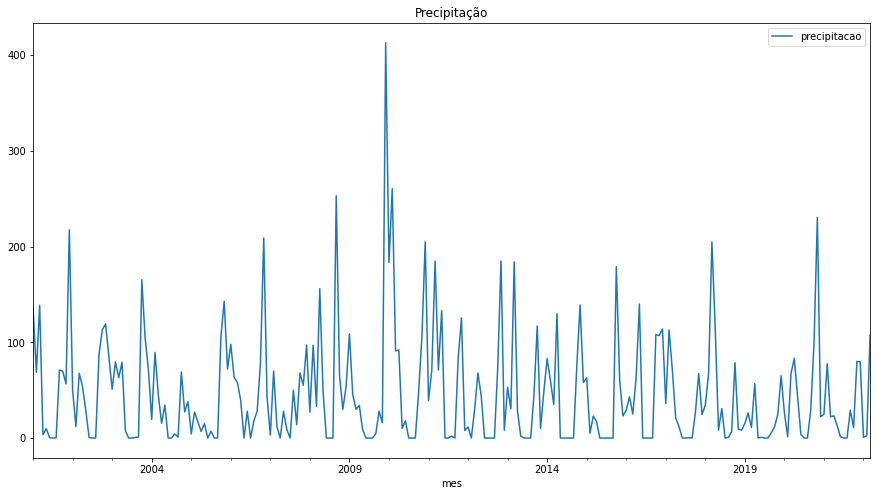

In [28]:
mydata.plot.line(figsize=(15,8), title='Precipitação')

### Forecast horizont

In [29]:
# forecast horizon variable
# 24 months forecast
fh = 24

In [30]:
# Split data into training and testing samples
data_split = load_data.test_training_split(mydata, months_test_size=fh)
train_data = data_split['train']
test_data = data_split['test']

In [31]:
train_data.tail()

,precipitacao
mes,
2019-11-01,24.8
2019-12-01,65.0
2020-01-01,26.4
2020-02-01,1.2
2020-03-01,67.4


In [32]:
train_data.shape

(231, 1)

In [33]:
test_data

,precipitacao
mes,
2020-04-01,83.2
2020-05-01,43.2
2020-06-01,3.8
2020-07-01,0.0
2020-08-01,0.0
2020-09-01,29.6
2020-10-01,100.0
2020-11-01,230.4
2020-12-01,22.2


### Data processing

In [34]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

# scale between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = sc.fit_transform(train_data)
print(train_data_scaled)

[[3.29055690e-01]
 [1.66343826e-01]
 [3.36077482e-01]
 [8.71670702e-03]
 [2.37288136e-02]
 [9.68523002e-04]
 [0.00000000e+00]
 [4.84261501e-04]
 [1.71912833e-01]
 [1.69007264e-01]
 [1.37046005e-01]
 [5.26392252e-01]
 [1.20581114e-01]
 [2.90556901e-02]
 [1.63680387e-01]
 [1.30750605e-01]
 [6.97336562e-02]
 [1.45278450e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.10653753e-01]
 [2.73607748e-01]
 [2.88619855e-01]
 [2.07263923e-01]
 [1.23486683e-01]
 [1.92251816e-01]
 [1.52542373e-01]
 [1.91767554e-01]
 [1.93704600e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.45278450e-03]
 [2.42130751e-03]
 [4.00484262e-01]
 [2.53753027e-01]
 [1.72397094e-01]
 [4.69733656e-02]
 [2.16464891e-01]
 [1.09443099e-01]
 [3.72881356e-02]
 [8.32929782e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.01694915e-02]
 [2.42130751e-03]
 [1.67070218e-01]
 [6.58595642e-02]
 [9.20096852e-02]
 [1.01694915e-02]
 [6.58595642e-02]
 [4.06779661e-02]
 [1.69491525e-02]
 [3.63196126e-02]
 [0.00000000e+00]
 [1.69491525e-02]
 [0.000000

In [35]:
# number of lags
n_lags = 24

In [36]:
X_train = []
y_train = []
for i in range(n_lags, train_data_scaled.shape[0]):
    X_train.append(train_data_scaled[i-n_lags:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train)
print(X_train.shape)
print(y_train)
print(y_train.shape)

[[0.32905569 0.16634383 0.33607748 ... 0.27360775 0.28861985 0.20726392]
 [0.16634383 0.33607748 0.00871671 ... 0.28861985 0.20726392 0.12348668]
 [0.33607748 0.00871671 0.02372881 ... 0.20726392 0.12348668 0.19225182]
 ...
 [0.08329298 0.16368039 0.49636804 ... 0.02808717 0.06004843 0.15738499]
 [0.16368039 0.49636804 0.27941889 ... 0.06004843 0.15738499 0.06392252]
 [0.49636804 0.27941889 0.01985472 ... 0.15738499 0.06392252 0.00290557]]
(207, 24)
[1.23486683e-01 1.92251816e-01 1.52542373e-01 1.91767554e-01
 1.93704600e-02 0.00000000e+00 0.00000000e+00 1.45278450e-03
 2.42130751e-03 4.00484262e-01 2.53753027e-01 1.72397094e-01
 4.69733656e-02 2.16464891e-01 1.09443099e-01 3.72881356e-02
 8.32929782e-02 0.00000000e+00 0.00000000e+00 1.01694915e-02
 2.42130751e-03 1.67070218e-01 6.58595642e-02 9.20096852e-02
 1.01694915e-02 6.58595642e-02 4.06779661e-02 1.69491525e-02
 3.63196126e-02 0.00000000e+00 1.69491525e-02 0.00000000e+00
 0.00000000e+00 2.56658596e-01 3.46246973e-01 1.74334140e-

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)
print(X_train.shape)

[[[0.32905569]
  [0.16634383]
  [0.33607748]
  ...
  [0.27360775]
  [0.28861985]
  [0.20726392]]

 [[0.16634383]
  [0.33607748]
  [0.00871671]
  ...
  [0.28861985]
  [0.20726392]
  [0.12348668]]

 [[0.33607748]
  [0.00871671]
  [0.02372881]
  ...
  [0.20726392]
  [0.12348668]
  [0.19225182]]

 ...

 [[0.08329298]
  [0.16368039]
  [0.49636804]
  ...
  [0.02808717]
  [0.06004843]
  [0.15738499]]

 [[0.16368039]
  [0.49636804]
  [0.27941889]
  ...
  [0.06004843]
  [0.15738499]
  [0.06392252]]

 [[0.49636804]
  [0.27941889]
  [0.01985472]
  ...
  [0.15738499]
  [0.06392252]
  [0.00290557]]]
(207, 24, 1)


### Models training

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [39]:
# Build neural network architecture
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
7/7 [==============================] - 6s 34ms/step - loss: 0.0253
Epoch 2/300
7/7 [==============================] - 0s 46ms/step - loss: 0.0226
Epoch 3/300
7/7 [==============================] - 0s 48ms/step - loss: 0.0213
Epoch 4/300
7/7 [==============================] - 0s 50ms/step - loss: 0.0214
Epoch 5/300
7/7 [==============================] - 0s 39ms/step - loss: 0.0211
Epoch 6/300
7/7 [==============================] - 0s 39ms/step - loss: 0.0212
Epoch 7/300
7/7 [==============================] - 0s 38ms/step - loss: 0.0209
Epoch 8/300
7/7 [==============================] - 0s 40ms/step - loss: 0.0206
Epoch 9/300
7/7 [==============================] - 0s 38ms/step - loss: 0.0205
Epoch 10/300
7/7 [==============================] - 0s 55ms/step - loss: 0.0208
Epoch 11/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0206
Epoch 12/300
7/7 [==============================] - 0s 43ms/step - loss: 0.0209
Epoch 13/300
7/7 [==============================]

7/7 [==============================] - 0s 37ms/step - loss: 0.0171
Epoch 104/300
7/7 [==============================] - 0s 50ms/step - loss: 0.0161
Epoch 105/300
7/7 [==============================] - 0s 45ms/step - loss: 0.0165
Epoch 106/300
7/7 [==============================] - 0s 41ms/step - loss: 0.0165
Epoch 107/300
7/7 [==============================] - 0s 40ms/step - loss: 0.0165
Epoch 108/300
7/7 [==============================] - 0s 40ms/step - loss: 0.0164
Epoch 109/300
7/7 [==============================] - 0s 47ms/step - loss: 0.0158
Epoch 110/300
7/7 [==============================] - 0s 47ms/step - loss: 0.0151
Epoch 111/300
7/7 [==============================] - 0s 45ms/step - loss: 0.0153
Epoch 112/300
7/7 [==============================] - 0s 43ms/step - loss: 0.0165
Epoch 113/300
7/7 [==============================] - 0s 53ms/step - loss: 0.0155
Epoch 114/300
7/7 [==============================] - 0s 39ms/step - loss: 0.0162
Epoch 115/300
7/7 [=======================

7/7 [==============================] - 0s 35ms/step - loss: 0.0133
Epoch 205/300
7/7 [==============================] - 0s 35ms/step - loss: 0.0127
Epoch 206/300
7/7 [==============================] - 0s 36ms/step - loss: 0.0110
Epoch 207/300
7/7 [==============================] - 0s 35ms/step - loss: 0.0133
Epoch 208/300
7/7 [==============================] - 0s 35ms/step - loss: 0.0130
Epoch 209/300
7/7 [==============================] - 0s 35ms/step - loss: 0.0118
Epoch 210/300
7/7 [==============================] - 0s 35ms/step - loss: 0.0125
Epoch 211/300
7/7 [==============================] - 0s 36ms/step - loss: 0.0130
Epoch 212/300
7/7 [==============================] - 0s 35ms/step - loss: 0.0129
Epoch 213/300
7/7 [==============================] - 0s 34ms/step - loss: 0.0124
Epoch 214/300
7/7 [==============================] - 0s 36ms/step - loss: 0.0114
Epoch 215/300
7/7 [==============================] - 0s 37ms/step - loss: 0.0101
Epoch 216/300
7/7 [=======================

In [41]:
inputs = mydata[len(mydata) - len(test_data) - n_lags:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(n_lags, inputs.shape[0]):
    X_test.append(inputs[i-n_lags:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_data = regressor.predict(X_test)
pred_data = sc.inverse_transform(pred_data)
print(pred_data)

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


[[ 60.714134 ]
 [ 16.82032  ]
 [ 12.3255205]
 [  6.5322447]
 [ 12.741041 ]
 [ 22.527176 ]
 [ 26.69375  ]
 [  6.5377374]
 [ 17.37415  ]
 [ 79.08948  ]
 [129.71484  ]
 [ 84.52528  ]
 [ 36.397404 ]
 [ 17.120007 ]
 [  8.612339 ]
 [  3.4172928]
 [  3.492403 ]
 [ 10.492712 ]
 [ 29.1395   ]
 [ 75.291405 ]
 [110.5486   ]
 [100.9354   ]
 [ 79.93335  ]
 [ 72.65317  ]]


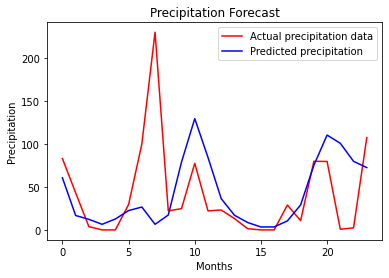

In [42]:
plt.plot(test_data.values, color = 'red', label = 'Actual precipitation data')
plt.plot(pred_data, color = 'blue', label = 'Predicted precipitation')
plt.title('Precipitation Forecast')
plt.xlabel('Months')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.metrics import mean_absolute_error

rmse = round(np.sqrt(mean_squared_error(test_data, pred_data)), 2)    
mae = round(mean_absolute_error(test_data, pred_data),2)    
mape = round(100*mean_absolute_percentage_error(test_data, pred_data), 2)
print("RMSE is ", rmse)
print("MAE is ", mae)
print("MAPE is ", mape,'%')

RMSE is  59.78
MAE is  36.28
MAPE is  4.913236115019101e+17 %
